In [1]:
from matplotlib import pyplot as plt
from utils_realsense import RealSenseSensor

In [2]:
realsense = RealSenseSensor("025222072234")

In [88]:
color, depth = realsense.frames(spatial=True, hole_filling=True, temporal=True)

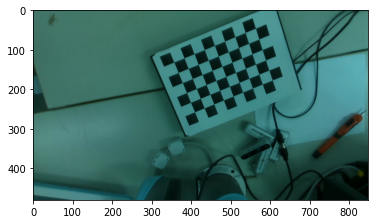

In [89]:
plt.imshow(color)

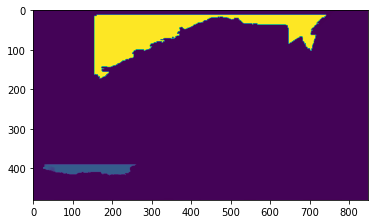

In [18]:
plt.imshow(depth)

In [12]:
import cv2
import numpy as np
import os
import glob

In [22]:
from calibration_helper import *

In [90]:
objpoints_rs, corners_rs = get_chessboard_corners(color)

In [36]:
K_rs = realsense._color_intrinsics
D_rs = 0#realsense._color_coeffs

In [39]:
err_value, R_vec_cam_to_chess, p_cam_to_chess = cv2.solvePnP(objpoints_rs, corners_rs, K_rs, D_rs)

In [40]:
R_vec_cam_to_chess

array([[ 0.24415709],
       [ 0.17850698],
       [-1.96417076]])

In [41]:
p_cam_to_chess

array([[-0.02594492],
       [-0.0554547 ],
       [ 0.55873566]])

In [84]:
CHECKERBOARD = (6, 9)
img = cv2.drawChessboardCorners(np.array(color), CHECKERBOARD, corners_rs, True)

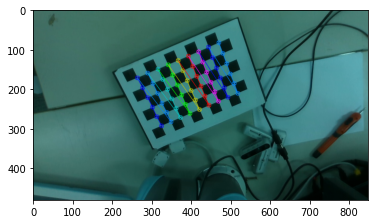

In [73]:
plt.imshow(img)

In [96]:
R_cam_to_chess, _ = cv2.Rodrigues(R_vec_cam_to_chess)
T_cam_to_chess = form_T(R_cam_to_chess, p_cam_to_chess)

In [97]:
R_cam_to_chess

array([[-0.3710265 ,  0.92502675, -0.08163849],
       [-0.90039193, -0.37986643, -0.21212232],
       [-0.22723054, -0.00519636,  0.97382713]])

In [98]:
T_cam_to_chess

array([[-0.3710265 ,  0.92502675, -0.08163849,  0.05636912],
       [-0.90039193, -0.37986643, -0.21212232, -0.08742367],
       [-0.22723054, -0.00519636,  0.97382713,  0.55609374],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [91]:
err_value, R_vec_cam_to_chess, p_cam_to_chess = cv2.solvePnP(objpoints_rs, corners_rs, K_rs, D_rs)

In [92]:
R_vec_cam_to_chess

array([[ 0.22118223],
       [ 0.15562269],
       [-1.95118186]])

In [93]:
p_cam_to_chess

array([[ 0.05636912],
       [-0.08742367],
       [ 0.55609374]])

In [94]:
CHECKERBOARD = (6, 9)
img = cv2.drawChessboardCorners(np.array(color), CHECKERBOARD, corners_rs, True)

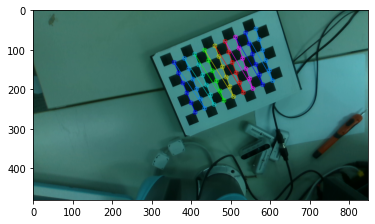

In [95]:
plt.imshow(img)